In [3]:
import re 
import tweepy 
from tweepy import OAuthHandler 
from textblob import TextBlob 
import pandas as pd

In [4]:
# authentication issues 
# https://stackoverflow.com/questions/37626253/authentication-failure-with-code-32

# Main tutorial 
# http://docs.tweepy.org/en/latest/auth_tutorial.html

consumer_key = 'krqMjrz9CX47w1bAKmgUxgOvy'
consumer_secret = 'ck0N29BfNva235PmiVkLenOt2vDAE7veNly4YHKj17pgF5qThA'
#access_token = '1076160163722248193-Akv2lZjA6S1mqG9ClFgU3ABu74Dw7b'
#access_token_secret = '9VvNgdD8xQKqm9TZSE9dSTkmC9uthUWzwIexGVS2H7ozh'


auth = tweepy.AppAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

for tweet in tweepy.Cursor(api.search, q='AMLO').items(10):
    print(tweet.text)

RT @EricBla90829613: También construcción de 2750 sucursales del BANCO DEL BIENESTAR y su administración. AMLO, quien aborrecía al Ejército…
RT @qtf: “El Tren Maya de la vergüenza”: la fuerte crítica del diario italiano La Reppublica contra la “magna” obra de AMLO - Infobae https…
RT @Consuelolvare11: @DEMIANRIVERA @lopezobrador_ #YoCreoEnLopezObrador 

Ante todo AMLO es presidente de todos los mexicanos y la vacuna s…
RT @me_duele_mexico: La vacuna de AstraZeneca la consiguió la fundación Carlos Slim.
Chairo: AMLO bueno, darme despensa, darme atole, tu ma…
RT @DrRalGalindo1: Seguiré luchando por el Mexico que todos queremos. 

Viva la 4T!!!
Viva AMLO 
#YoCreoEnLopezObrador 

Voto masivo para M…
RT @revistapolemon: Pese a la pandemia, la recuperación económica de México 🇲🇽 con el Presidente @lopezobrador_ es una realidad 😎👊

https:/…
RT @Consuelolvare11: @DEMIANRIVERA @lopezobrador_ #YoCreoEnLopezObrador 

Ante todo AMLO es presidente de todos los mexicanos y la vacuna s…
RT @AlExCoL06

In [34]:
# Main tutorial
# Sentiment analysis using the Twitter API
# Nov 28th 
# https://www.geeksforgeeks.org/twitter-sentiment-analysis-using-python/    
    
# Token account: bacterimuerta    
# The name of the class is TwitterClient     
class TwitterClient(object): 
    ''' 
    Generic Twitter Class for sentiment analysis. 
    '''
    # No parameters for inti method 
    # this class is initialized as an empty object. 
    # init method basically logs in the twitter api and creates the api object 
    def __init__(self): 
        ''' 
        Class constructor or initialization method. 
        '''
        # keys and tokens from the Twitter Dev Console 
        # Dec 2 2020: Update from bacteriamuerta account
        consumer_key = 'krqMjrz9CX47w1bAKmgUxgOvy'
        consumer_secret = 'ck0N29BfNva235PmiVkLenOt2vDAE7veNly4YHKj17pgF5qThA'
         
        #access_token = '1076160163722248193-Akv2lZjA6S1mqG9ClFgU3ABu74Dw7b'
        #access_token_secret = '9VvNgdD8xQKqm9TZSE9dSTkmC9uthUWzwIexGVS2H7ozh'
  
        # attempt authentication 
        try: 
            # create OAuthHandler object 
            # self.auth = tweepy.OAuthHandler(consumer_key, consumer_secret) 
            self.auth = tweepy.AppAuthHandler(consumer_key, consumer_secret)
            # set access token and secret 
            #self.auth.set_access_token(access_token, access_token_secret) 
            # create tweepy API object to fetch tweets 
            #self.api = tweepy.API(self.auth) 
            self.api = tweepy.API(self.auth)
        except: 
            print("Error: Authentication Failed") 
  
    def clean_tweet(self, tweet): 
        ''' 
        Utility function to clean tweet text by removing links, special characters 
        using simple regex statements. 
        '''
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) |(\w+:\/\/\S+)", " ", tweet).split()) 
  
    def get_tweet_sentiment(self, tweet): 
        ''' 
        Utility function to classify sentiment of passed tweet 
        using textblob's sentiment method 
        '''
        # create TextBlob object of passed tweet text 
        analysis = TextBlob(self.clean_tweet(tweet)) 
        # set sentiment 
        if analysis.sentiment.polarity > 0: 
            return 'positive'
        elif analysis.sentiment.polarity == 0: 
            return 'neutral'
        else: 
            return 'negative'
  
    def get_tweets(self, query, count = 10): 
        ''' 
        Main function to fetch tweets and parse them. 
        '''
        # empty list to store parsed tweets 
        tweets = [] 
  
        try: 
            # call twitter api to fetch tweets 
            fetched_tweets = self.api.search(q = query, count = count) 
  
            # parsing tweets one by one 
            for tweet in fetched_tweets: 
                # empty dictionary to store required params of a tweet 
                parsed_tweet = {} 
  
                # saving text of tweet 
                parsed_tweet['text'] = tweet.text 
                # saving sentiment of tweet  (it also does the cleaning )
                parsed_tweet['sentiment'] = self.get_tweet_sentiment(tweet.text) 
  
                # appending parsed tweet to tweets list 
                if tweet.retweet_count > 0: 
                    # if tweet has retweets, ensure that it is appended only once 
                    if parsed_tweet not in tweets: 
                        tweets.append(parsed_tweet) 
                else: 
                    tweets.append(parsed_tweet) 
  
            # return parsed tweets 
            return tweets 
  
        except tweepy.TweepError as e: 
            # print error (if any) 
            print("Error : " + str(e)) 
  
def main(): 
    # creating object of TwitterClient Class 
    api = TwitterClient() 
    # calling function to get tweets 
    tweets = api.get_tweets(query = 'stock market', count = 1000) 
  
    # picking positive tweets from tweets 
    ptweets = [tweet for tweet in tweets if tweet['sentiment'] == 'positive'] 
    # percentage of positive tweets 
    print("Positive tweets percentage: {} %".format(100*len(ptweets)/len(tweets))) 
    # picking negative tweets from tweets 
    ntweets = [tweet for tweet in tweets if tweet['sentiment'] == 'negative'] 
    # percentage of negative tweets 
    print("Negative tweets percentage: {} %".format(100*len(ntweets)/len(tweets))) 
    # percentage of neutral tweets 
    print("Neutral tweets percentage: {} %".format(100*(len(tweets) -(len( ntweets )+len( ptweets)))/len(tweets))) 
  
    # printing first 5 positive tweets 
    print("\n\nPositive tweets:") 
    for tweet in ptweets[:10]: 
        print(tweet['text']) 
  
    # printing first 5 negative tweets 
    print("\n\nNegative tweets:") 
    for tweet in ntweets[:10]: 
        print(tweet['text']) 
  
if __name__ == "__main__": 
    # calling main function 
    main() 


Positive tweets percentage: 37.03703703703704 %
Negative tweets percentage: 19.753086419753085 %
Neutral tweets percentage: 43.20987654320987 %


Positive tweets:
RT @realDonaldTrump: STOCK MARKET REACHES NEW ALL-TIME HIGH!
3 High-Flying Stocks that Should Move Higher
 https://t.co/cQoVdApGEn
RT @adamcbest: If trickle-down economics worked at all, like even a teeny-tiny bit, people wouldn’t be flocking to food banks right as the…
RT @Investor_stockM: In Stock market..... 

Long term always Win Against Short term.
@Munna28455654 It is important to note that even though the intrinsic value may be x, the market should be willing… https://t.co/tCCeFcHdJy
@808sandU3O8 @TBirdV @omnipotent32 Don’t think it implies that at all. Many commodities have dozens of cycles under… https://t.co/VgNC6irUPg
Sure a paycheck from the Stock Market. #GEORGIA https://t.co/wxhyYXbo0x
i never know this stock market issue was this fun lmao
@themukulagrawal The real fact of stock market.
The Dow Jones Industrial 

# User timeline: daily sentiment 
https://stackoverflow.com/questions/49731259/tweepy-get-tweets-between-two-dates

In [5]:
%%time
import datetime


# Log in Twitter API 
auth = tweepy.AppAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

# Which username to compute sentiment from 
username = 'realDonaldTrump'
tweets = []
sentiments = []

for tweet in tweepy.Cursor(api.user_timeline, screen_name='@jimcramer' ).items():
    tweets.append(tweet)
    
# 100 tweets almost immediate     
# 1000 tweets in 10 seconds 
# 3k tweets in 30 seconds (default when no )
len(tweets)

CPU times: user 4.01 s, sys: 362 ms, total: 4.37 s
Wall time: 38.7 s


3247

In [6]:
%%time
# Alternative to Textblob: for spanish
# This solved the library problem with sciki-learn 
# https://stackoverflow.com/questions/46178199/python-sklearn-model-selection-giving-error-unable-to-import-comb

# Install the classifier library
#from classifier import SentimentClassifier
#sent_classifier = SentimentClassifier()       
# main function for sentiment using TextBlob
def get_tweet_sentiment(tweet, clf_type = 1):
    ''' 
    Utility function to classify sentiment of passed tweet 
    using textblob's sentiment method 
    '''
    #clf = SentimentClassifier()
    # make it clean from usernames and web links 
    # This line will remove all @username (@[A-Za-z0-9]+)
    # www://whatever  (\w+:\/\/\S+)
    # split() returns a list of strings 
    # to each string in the list, we add ' ' with ' '.join() 
    # beside those things, the tweet is still complete with prepositions, nouns, etc 

    clean_tweet = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) |(\w+:\/\/\S+)", " ", tweet).split())
    # create TextBlob object of passed tweet text 
    if clf_type ==1: 
        analysis = TextBlob(clean_tweet) 
        return(analysis.sentiment.polarity)
    else: 
        #analysis = clf.predict(clean_tweet)
        return(analysis)
    # set sentiment 
    # we return the actual number so we can average easily over time 
    
        
    

parsed_tweets = [] #clean tweets that fall within the data range we specified 
sentiments = [] 
dates = []
sentiments_sp = []

startDate = datetime.datetime(2014, 6, 1, 0, 0, 0)
endDate =   datetime.datetime(2020, 12, 31, 0, 0, 0) # last day of 2020


# Analyze only tweets in the given date range 
for tweet in tweets:
    if tweet.created_at < endDate and tweet.created_at > startDate: # only if they were created during the data range 
        parsed_tweets.append(tweet)
        sentiments.append( get_tweet_sentiment(tweet.text, clf_type = 1))
        dates.append(tweet.created_at.strftime("%m/%d/%Y"))
        #sentiments_sp.append( get_tweet_sentiment(tweet.text, clf_type = 2))         # This classifier works with spanish training 

        
#sentiment_ts = pd.DataFrame({'Date': dates, 'sentiment': sentiments, 'sentiment_ES': sentiments_sp})
sentiment_ts = pd.DataFrame({'Date': dates, 'sentiment': sentiments})

sentiment_ts['Date'] =pd.to_datetime(sentiment_ts.Date)
sentiment_ts.sort_values('Date') # This now sorts in date order 
sentiment_daily = sentiment_ts.groupby('Date').mean() # we take the average daily sentiment 


# 7 day window average 
sentiment_daily['7day_sentiment'] = sentiment_daily.sentiment.rolling(7).mean().shift(-3)
#sentiment_daily['7day_ES'] = sentiment_daily.sentiment_ES.rolling(7).mean().shift(-3)

sentiment_daily.head()
# 3.27 min to run 3k tweets 

CPU times: user 946 ms, sys: 7.3 ms, total: 953 ms
Wall time: 953 ms


,sentiment,7day_sentiment
Date,,
2020-09-22,0.380342,NaN
2020-09-23,0.151722,NaN
2020-09-24,0.168493,NaN
2020-09-25,0.047947,0.200033
2020-09-26,0.214583,0.168574


Text(0, 0.5, 'Tweet Sentiment')

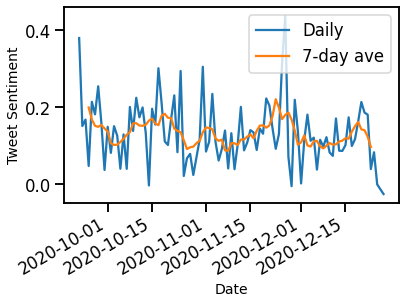

In [7]:
import seaborn as sns 
import matplotlib.dates as mdates 
import matplotlib.pyplot as plt

sentiment_daily.index = pd.to_datetime(sentiment_daily.index)
# bigger plot elements suitable for giving talks
sns.set_context("talk")

fig, ax = plt.subplots() 
sns.lineplot(data = sentiment_daily, x ='Date', y = 'sentiment',  label ='Daily', ci = None)

sns.lineplot(data = sentiment_daily, x = 'Date', y = '7day_sentiment', label = '7-day ave', ci = None)
fig.autofmt_xdate() 

plt.xlabel("Date", size=14)
plt.ylabel("Tweet Sentiment", size=14)

(146, 4)

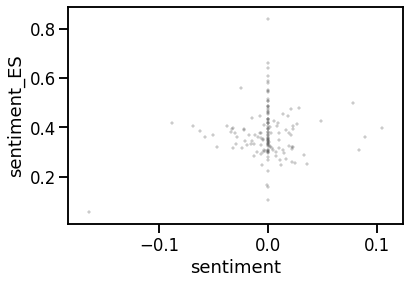

In [31]:
# If using Spanish classifier 
sns.scatterplot(data = sentiment_daily, x = 'sentiment', y = 'sentiment_ES',
                s=10, color=".2", marker="+")
sentiment_daily.shape

In [8]:
from textblob import TextBlob
 
blob = TextBlob("Comment vas-tu?")
 
print(blob.detect_language())
 
print(blob.translate(to='es'))
print(blob.translate(to='en'))
print(blob.translate(to='zh'))

fr
¿Cómo estás tú?
How are you?
你好吗？


## Alternative: spaCY

In [16]:
import spacy

# Create the pipeline parser 
nlp = spacy.load("en_core_web_sm")
#spacy.load('en_core_web_sm')

# Put all the tweets together as text objects 
# 
texts = []
for tweet in tweets: 
    texts.append(tweet.text)

len(texts)

3247

In [11]:
%%time 
# Update Dec 27
# Run the pipeline on each tweet 
# 3k tweets in 7.81 s 

# Run spacy on a list using the pipe function as opposed to for loop
docs = list(nlp.pipe(texts))


CPU times: user 6.52 s, sys: 1.27 s, total: 7.79 s
Wall time: 7.81 s


In [13]:
# tokenize the text by passing it into the nlp constructor.
token_list = [token for token in docs[0]]
token_list

[Only,
 a,
 few,
 spots,
 left,
 in,
 the,
 Triple,
 C,
 :,
 Cramer,
 's,
 Cash,
 Contest,
 .,
 Get,
 in,
 on,
 the,
 action,
 on,
 @DraftKings,
 for,
 Week,
 16,
 for,
 j,
 …,
 https://t.co/jZhHTk2LTM]

In [14]:
# Filter stop words (automatically done as part of the nlp pipeline)
# Remove stop words 
filtered_tokens = [token for token in docs[1] if not token.is_stop]
filtered_tokens

[Merry, Christmas, !, !]

In [51]:
# Word normalization 
lemmas = [
     f"Token: {token}, lemma: {token.lemma_}"
     for token in filtered_tokens
 ]
lemmas

['Token: thanks, lemma: thanks',
 'Token: raise, lemma: raise',
 'Token: good, lemma: good',
 'Token: point, lemma: point',
 'Token: raised, lemma: raise',
 'Token: .., lemma: ..',
 'Token: https://t.co/tQ4qztoGyj, lemma: https://t.co/tq4qztogyj']